<H1 style="text-align:center; font-size : 40px; font-family : 'Poppins'; "><strong>Data Science Final Project - Car Insurance Fraud Detection</strong>  </H1>

<a id = '0'></a>
<p style = "font-size : 35px; font-family : 'Poppins'; border-radius: 10px; "><strong>Table of Content</strong></p> 

* [Data Analysis](#1.0)
    * [Data Exploration](#1.1)
    * [Data Visualization](#1.2)
    * [Handling Missing Values](#1.3)
    * [Normalization](#1.4)
    * [Creating New Features](#1.5)
    * [Label Encoding](#1.6)
    * [Handling Imbalanced Data](#1.7)
    * [Features Selection](#1.8)
    
* [Models](#2.0)
    * [Run Models And Evaluate Function](#2.1)
    * [Initial Evaluation - All Models](#2.2)
    * [Second Evaluation - All Models - Hyperparameters dictionary. Using 10 fold cross validation](#2.3)
    * [Third Evaluation - All Models - Hyperparameters dictionary + Initial Feature Selection](#2.4)
    * [Fourth Evaluation - All Models - Hyperparameters dictionary Changed](#2.5)
    * [Fifth Evaluation - All Models - Added Features](#2.6)
    * [Final Evaluation - All Models](#2.7)
    * [Further Results - Selected Models](#2.8)
    * [Conclusions](#2.9)
  


### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from category_encoders.ordinal import OrdinalEncoder
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import time

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from tabulate import tabulate


import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('/kaggle/input/vehicle-claim-fraud-detection/fraud_oracle.csv')

<a id = '1.0'></a>
<p style = "font-size : 35px; font-family : 'Poppins'; border-radius: 10px;"><strong>Data Analysis</strong></p> 

<a id = '1.1'></a>
<p style = "font-size : 25px; font-family : 'Poppins'; border-radius: 10px;"><strong>Data Exploration</strong></p>

In [3]:
df.shape

(15420, 33)

In [4]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [5]:
# Get an overview of the dataset
df.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                     int64
BasePoli

In [6]:
# Summary statistics for numerical columns - will help us see relevant statistics
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [7]:
# Check for missing values
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [8]:
#Checking for duplicate values
df.duplicated().sum()

0

<a id = '1.2'></a>
<p style = "font-size : 25px; font-family : 'Poppins'; border-radius: 10px;"><strong>Data Visualization</strong></p>

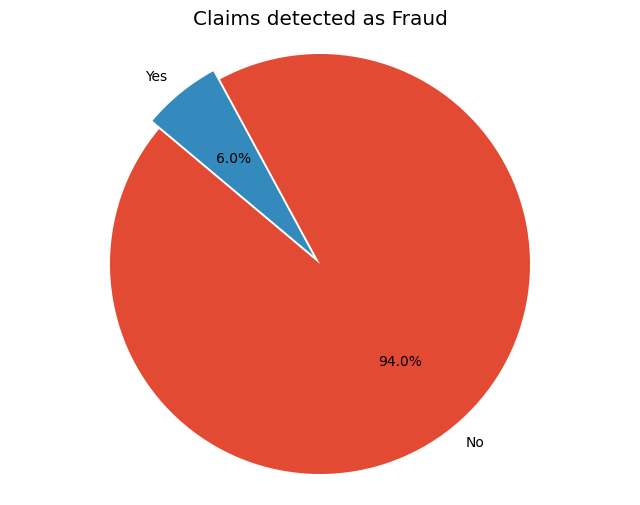

In [9]:
df = df.rename(columns={'FraudFound_P': 'FraudFound'})

# Check how many records are fraud and plot pie chart
labels = df.FraudFound.value_counts().index
labels = ["No" if i==0 else "Yes" for i in labels]
sizes = df.FraudFound.value_counts().values


plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,explode=[0.05,0])
plt.title('Claims detected as Fraud')
plt.axis('equal') 
plt.show()

***Only 6% of the claims reported as fraud. As it was expected, the dataset is imbalanced***

### I'll Show how many claims in the data are actually fraud from each vehicle category (Seden, Sport, Utility):

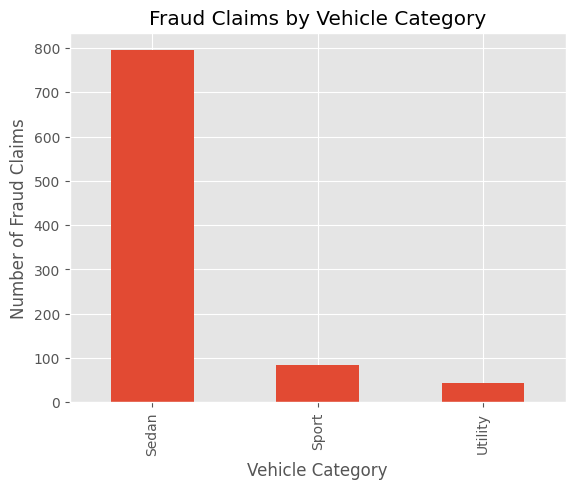

In [10]:
# Filter the data for all claims that are Fraud
df_fraud = df[df['FraudFound'] == 1]  
# Count the number claims in each vehicle category
fraud_counts = df_fraud['VehicleCategory'].value_counts()
fraud_counts.plot(kind='bar')
plt.title('Fraud Claims by Vehicle Category')
plt.xlabel('Vehicle Category')
plt.ylabel('Number of Fraud Claims')
plt.show()


***The majority of fraud claims are of sedan cars.***


### Age distribution graph

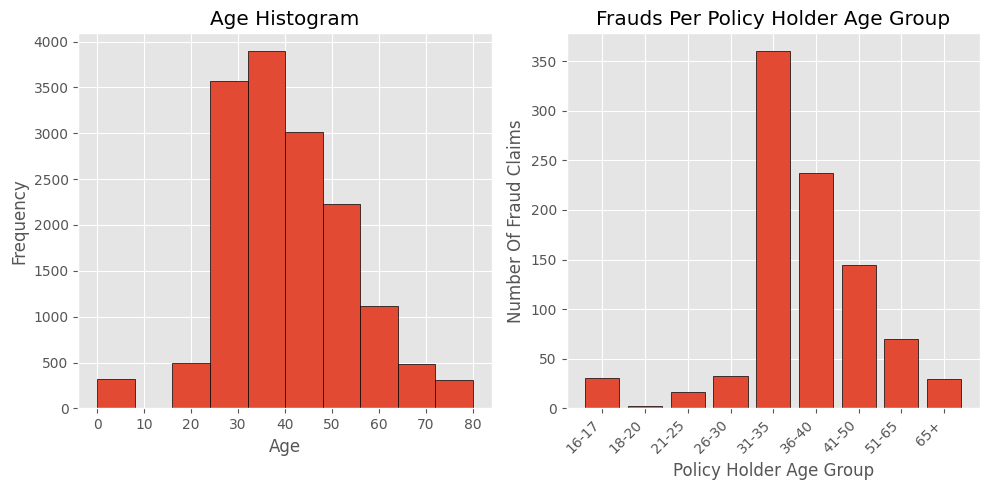

In [11]:
# Explore age distribution in general and in fraud records
plt.figure(figsize=(10, 5))
# Age histogram
plt.subplot(1, 2, 1)
plt.hist(df['Age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram')


mapping_dict = {
    '16 to 17': '16-17',
    '18 to 20': '18-20',
    '21 to 25': '21-25',
    '26 to 30': '26-30',
    '31 to 35': '31-35',
    '36 to 40': '36-40',
    '41 to 50': '41-50',
    '51 to 65': '51-65',
    'over 65': '65+'
}

# Replace values in the DataFrame column
df['AgeOfPolicyHolder'] = df['AgeOfPolicyHolder'].replace(mapping_dict)

# Frauds Per Policy Holder Age Group histogram
plt.subplot(1, 2, 2)  
policyAge = df.groupby('AgeOfPolicyHolder')['FraudFound'].sum()
bars = plt.bar(policyAge.index, policyAge.values, edgecolor='black')
plt.title("Frauds Per Policy Holder Age Group")
plt.xlabel("Policy Holder Age Group")
plt.ylabel("Number Of Fraud Claims")
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()


***We can notice that there are few records (less than 500) that the age is less than 10, probably missing data got 0 value. We will rtake care of it later***


### Fraud VS No Fraud distribution by Month graph

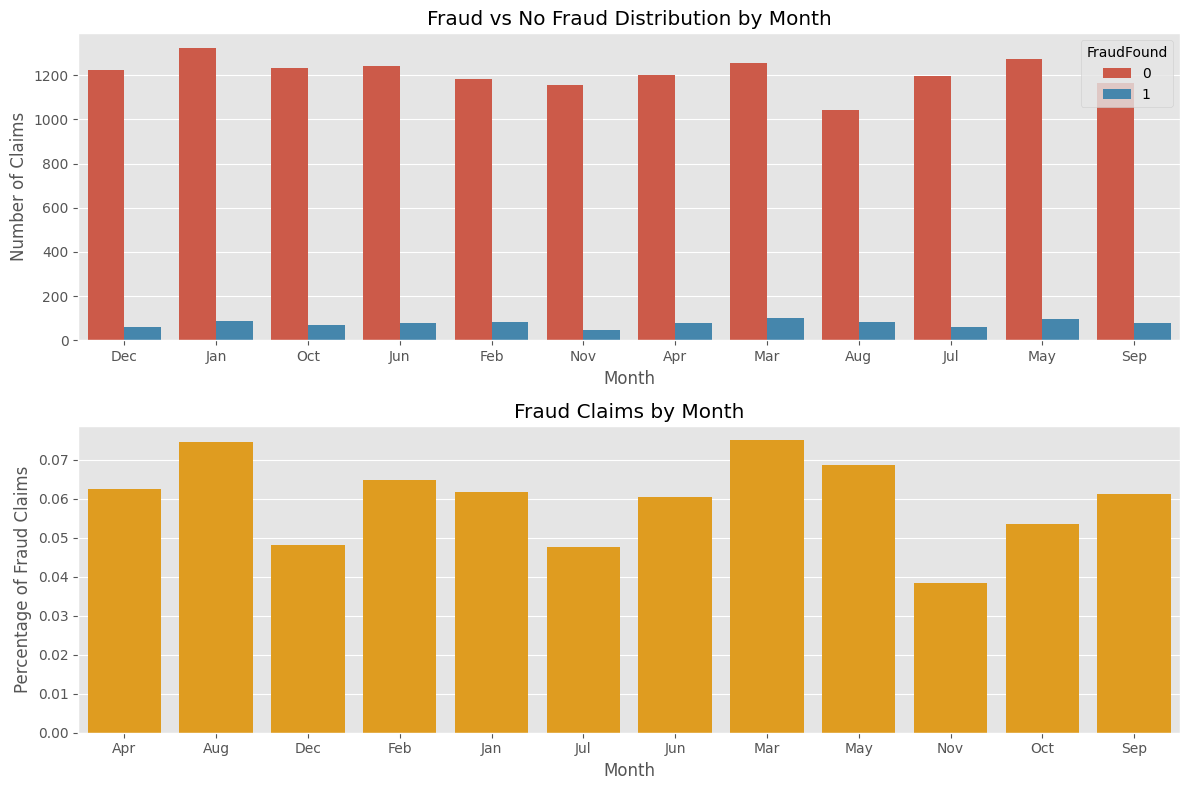

In [12]:
fig, axs = plt.subplots(2, figsize=(12, 8))

# Plot the count of fraud vs no fraud distribution by month
sns.countplot(x="Month", hue='FraudFound', data=df, ax=axs[0])
axs[0].set_title('Fraud vs No Fraud Distribution by Month')
axs[0].set_ylabel('Number of Claims')

# Calculate percentage of fraud cases to total cases in each month
total_claims_by_month = df['Month'].value_counts()
fraud_df = df[df['FraudFound'] == 1]
fraud_counts_by_month = fraud_df['Month'].value_counts()
fraud_proportion_by_month = (fraud_counts_by_month / total_claims_by_month).fillna(0)

# Plot the proportion of fraud claims by month
sns.barplot(x=fraud_proportion_by_month.index, y=fraud_proportion_by_month.values, color='orange', ax=axs[1])
axs[1].set_title('Fraud Claims by Month')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Percentage of Fraud Claims')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


##### *We can see that in the months og August and March the number of fraud claims out of the total claims is the highest*

### Frauds per Car Make graph

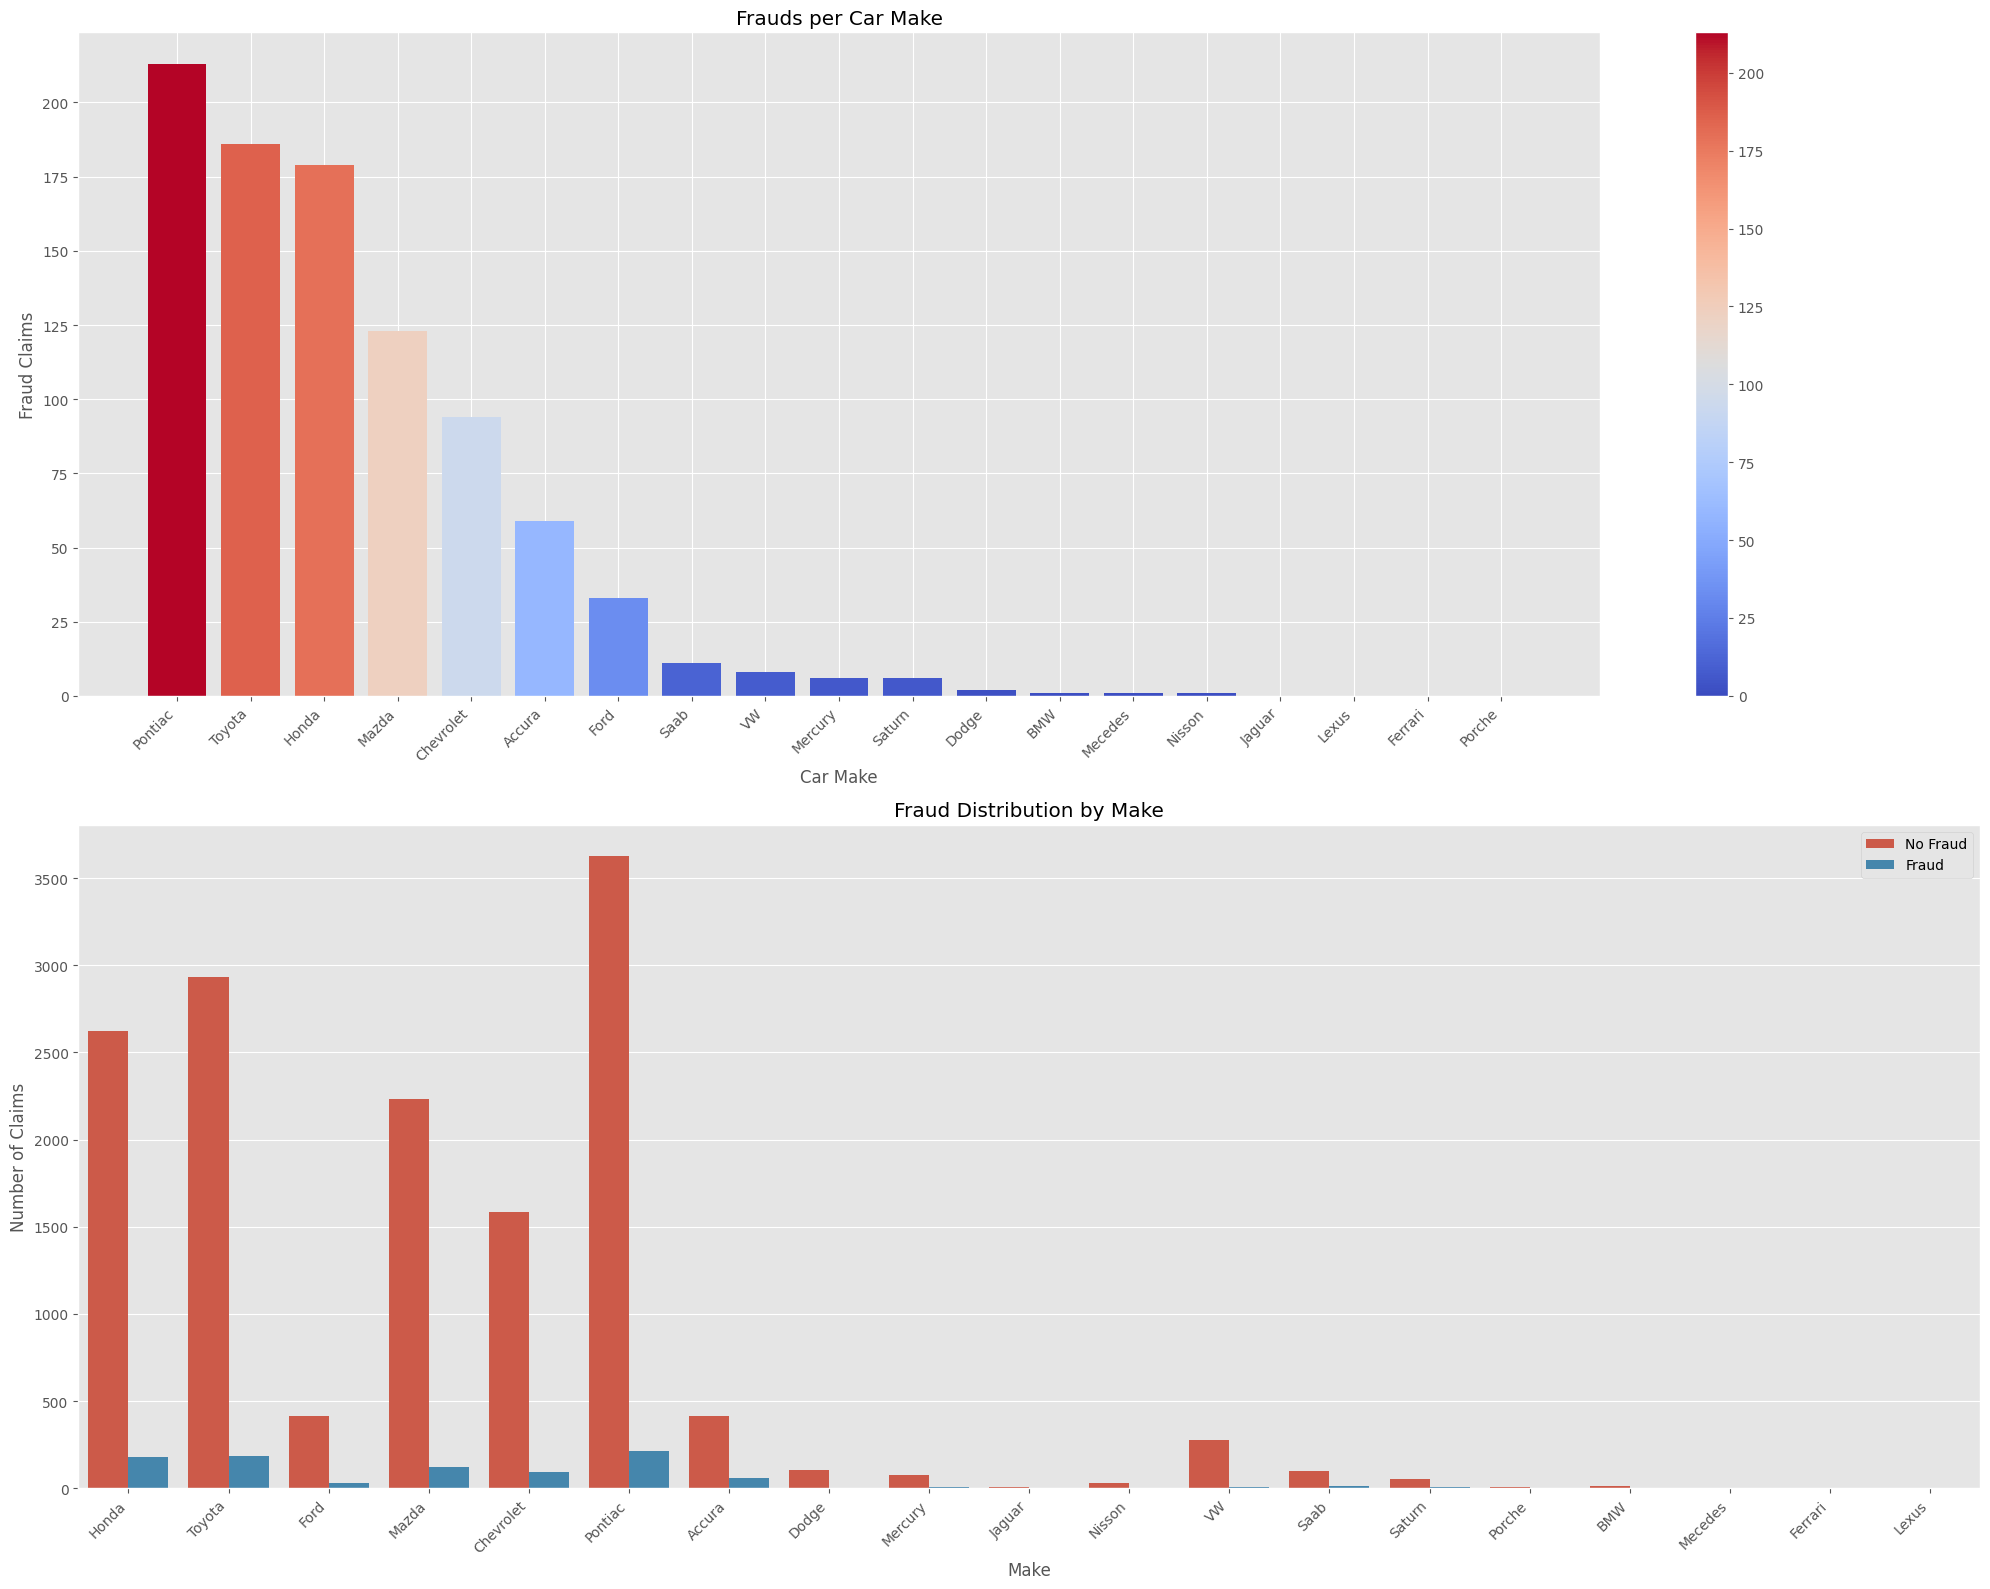

In [13]:
plt.figure(figsize=(20, 16))

# Plot the first graph: Frauds per Car Make
make_frauds = df.groupby('Make')['FraudFound'].sum()
make_frauds = make_frauds.sort_values(ascending=False)

norm = plt.Normalize(make_frauds.min(), make_frauds.max())
colors = plt.cm.coolwarm(norm(make_frauds.values))

plt.subplot(2, 1, 1)
bars = plt.bar(make_frauds.index, make_frauds.values, color=colors)
plt.title("Frauds per Car Make")
plt.xlabel("Car Make")
plt.ylabel("Fraud Claims")

sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
plt.xticks(rotation=45, ha='right')

# Plot the second graph: Fraud distribution by Make
plt.subplot(2, 1, 2)
sns.countplot(x="Make", hue='FraudFound', data=df)

labels = ['No Fraud', 'Fraud']
plt.legend(labels)
plt.title('Fraud Distribution by Make')
plt.xlabel('Make')
plt.ylabel('Number of Claims')
plt.xticks(rotation=45, ha='right')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


* ***On the first graph We can see that for luxury cars like Jaguar Ferrari and Porche there are few to zero evidence of frauds, while the majority of fraudclaims are for car makes like Toyota, Honda and pontiac.***
* ***On the second graph we can see the fraud cases vs non fraud cases for each car make.***


### Fraud Cases by Sex

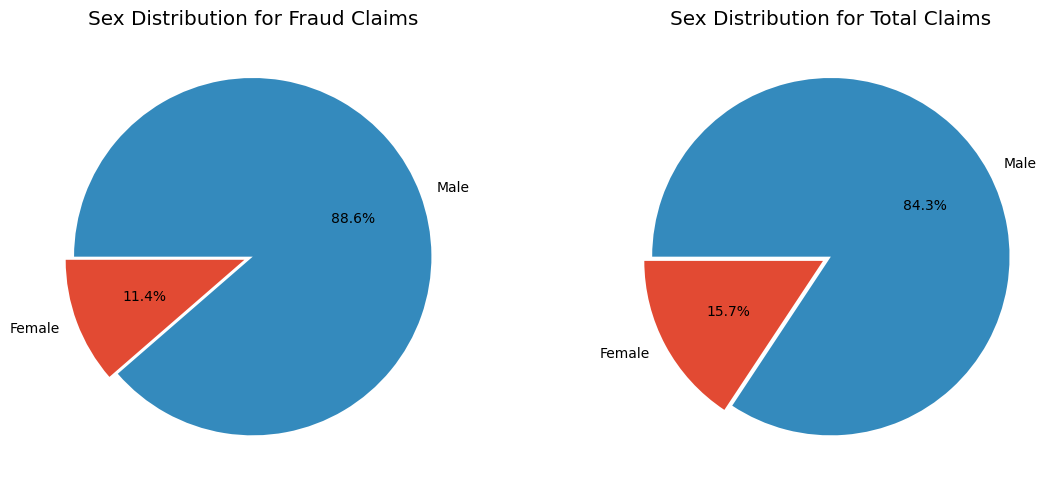

In [14]:
# Pie Chart for Fraud Cases by Sex
fraud_by_sex = df[df['FraudFound'] == 1].groupby('Sex').size()

sex_distribution = df['Sex'].value_counts().sort_index()


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot pie chart for Fraud Cases by Sex
axes[0].pie(fraud_by_sex, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=180, explode=[0.05,0])
axes[0].set_title('Sex Distribution for Fraud Claims')

# Plot pie chart for Sex Distribution for All Data
axes[1].pie(sex_distribution, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=180, explode=[0.05,0])
axes[1].set_title('Sex Distribution for Total Claims')

plt.tight_layout()
plt.show()


### Fraud cases by Accident Area

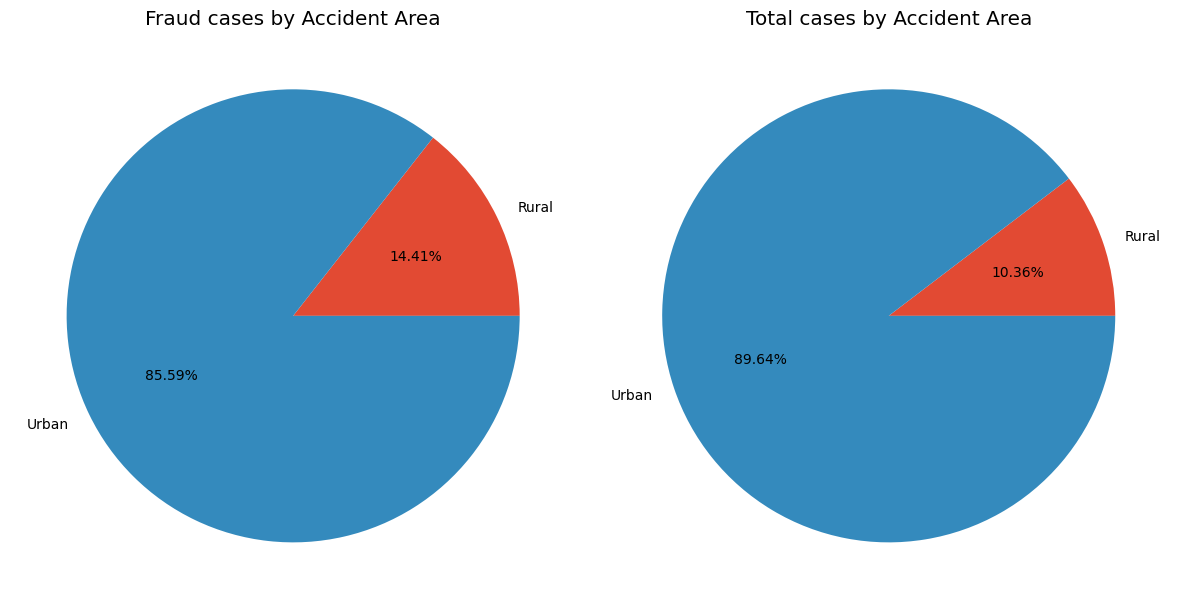

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot Fraud cases by Accident Area
accident_area_fraud = df[df['FraudFound'] == 1].groupby('AccidentArea').size()
labels = ['Rural', 'Urban']
axs[0].pie(accident_area_fraud, labels=labels, autopct='%1.2f%%')
axs[0].set_title('Fraud cases by Accident Area')

# Plot Total cases by Accident Area
accident_area_total = df['AccidentArea'].value_counts().sort_index()
axs[1].pie(accident_area_total, labels=labels, autopct='%1.2f%%')
axs[1].set_title('Total cases by Accident Area')

plt.tight_layout()
plt.show()




### *Here we can see something interesting. The percentage of claims un rural places are higher for fraud claims*

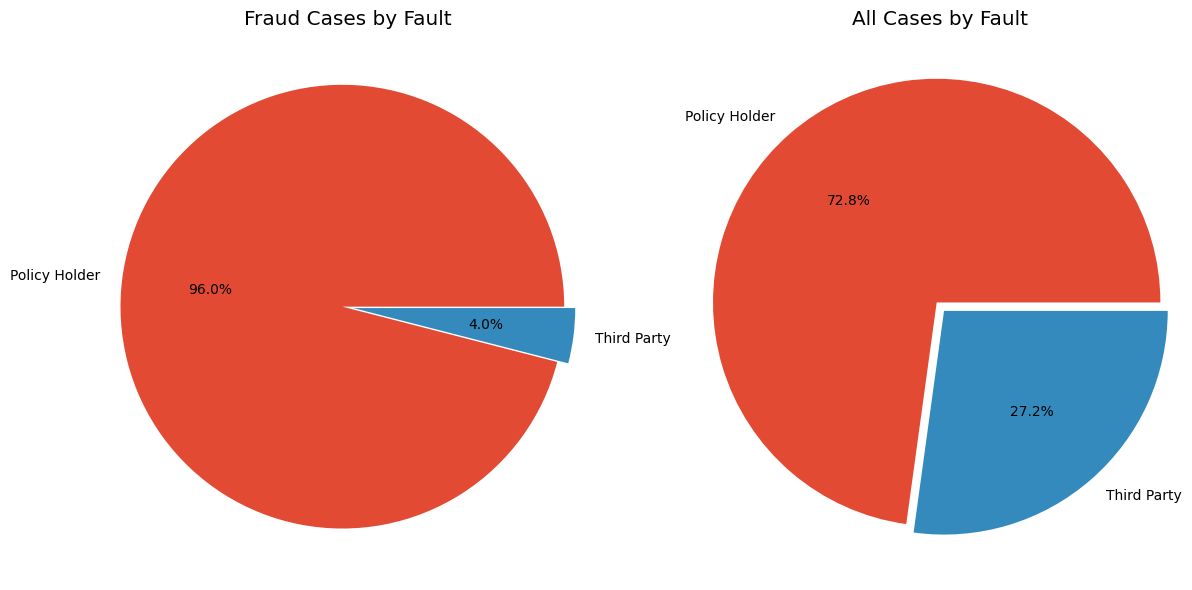

In [16]:
# Plot Fraud cases by fault - policy holder/third party
fraud_by_fault_fraud = df[df['FraudFound'] == 1].groupby('Fault').size()
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1 - Fraud Cases by Fault
axs[0].pie(fraud_by_fault_fraud, labels=fraud_by_fault_fraud.index, autopct='%1.1f%%', explode=[0.05,0])
axs[0].axis('equal')
axs[0].set_title('Fraud Cases by Fault')

# Plot All cases by fault - policy holder/third party
fraud_by_fault_all = df.groupby('Fault').size()


fraud_by_fault_all = fraud_by_fault_all.reindex(fraud_by_fault_fraud.index, fill_value=0)

# Plot 2 - All Cases by Fault
axs[1].pie(fraud_by_fault_all, labels=fraud_by_fault_all.index, autopct='%1.1f%%',explode=[0.05,0])
axs[1].axis('equal')
axs[1].set_title('All Cases by Fault')

plt.tight_layout()
plt.show()

***We can see that most of fraud cases where claimed by the policy holder***

### Fraud Cases by number of cars

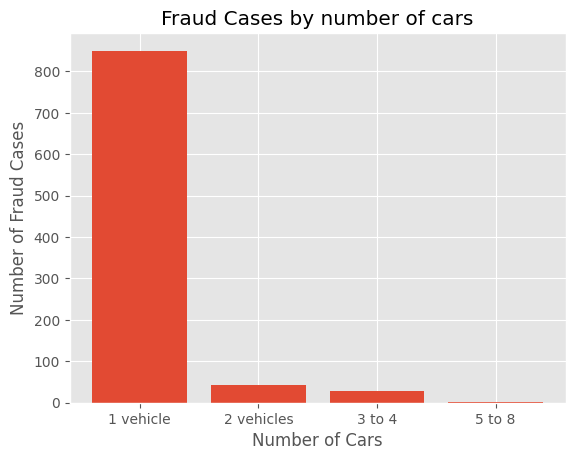

In [17]:
fraud_by_cars = df[df['FraudFound'] == 1].groupby('NumberOfCars').size()
fig, ax = plt.subplots()
ax.bar(fraud_by_cars.index.astype(str), fraud_by_cars)
ax.set_xlabel('Number of Cars')
ax.set_ylabel('Number of Fraud Cases')
ax.set_title('Fraud Cases by number of cars')

plt.show()

***We can see that the majority of fraud claims comitted by policy holders who have only one car***


<a id = '1.3'></a>
<p style = "font-size : 25px; font-family : 'Poppins'; border-radius: 10px;"><strong>Handling Missing Values</strong></p>


**First we will see all unique values**

In [18]:
# get rid of policy number column
df.drop(columns=['PolicyNumber'], inplace=True)

In [19]:
def get_unique_values_df(df):
    """
    Generate a DataFrame displaying unique values for each column in the input DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame containing data.

    Returns:
    DataFrame: DataFrame with columns 'Column Name' and 'Unique Values'.
    """
    pd.set_option('max_colwidth', None)
    data = []
    for column in df:
        unique_values = ', '.join(map(str, df[column].unique()))
        data.append([column, unique_values])

    # Create a new DataFrame to display the unique values
    unique_values_df = pd.DataFrame(data, columns=['Column Name', 'Unique Values'])
    return unique_values_df







get_unique_values_df(df)

,Column Name,Unique Values
0,Month,"Dec, Jan, Oct, Jun, Feb, Nov, Apr, Mar, Aug, Jul, May, Sep"
1,WeekOfMonth,"5, 3, 2, 4, 1"
2,DayOfWeek,"Wednesday, Friday, Saturday, Monday, Tuesday, Sunday, Thursday"
3,Make,"Honda, Toyota, Ford, Mazda, Chevrolet, Pontiac, Accura, Dodge, Mercury, Jaguar, Nisson, VW, Saab, Saturn, Porche, BMW, Mecedes, Ferrari, Lexus"
4,AccidentArea,"Urban, Rural"
5,DayOfWeekClaimed,"Tuesday, Monday, Thursday, Friday, Wednesday, Saturday, Sunday, 0"
6,MonthClaimed,"Jan, Nov, Jul, Feb, Mar, Dec, Apr, Aug, May, Jun, Sep, Oct, 0"
7,WeekOfMonthClaimed,"1, 4, 2, 3, 5"
8,Sex,"Female, Male"
9,MaritalStatus,"Single, Married, Widow, Divorced"


**We can notice:**
* DayOfWeekClaimed - contains a 0 instead of a day of the week
* MonthClaimed - contains a 0 instead of the month
* Age - contains a 0 instead of the age
* PolicyType - appears to be a concatenation of VehicleCategory and BasePolicy

In [20]:
#Investigate the 0 in DayOfWeekClaimed and MonthClaimed
print('DayOfWeekClaimed has ', len(df.loc[(df['DayOfWeekClaimed']=='0')]), ' row(s) with a 0')
print('MonthClaimed has ',len(df.loc[(df['MonthClaimed']=='0')]),' row(s) with a 0\n') 


# Idendtify which row effected
print('Row ', df.loc[(df['DayOfWeekClaimed']=='0')].index[0], ' has 0 value in DayOfWeekClaimed')
print('Row ', df.loc[(df['MonthClaimed']=='0')].index[0], ' has 0 value in MonthClaimed')

# Both are zero in the same row (row 1516). 

# we will drop this row
df = df.loc[df['DayOfWeekClaimed']!='0']


DayOfWeekClaimed has  1  row(s) with a 0
MonthClaimed has  1  row(s) with a 0

Row  1516  has 0 value in DayOfWeekClaimed
Row  1516  has 0 value in MonthClaimed


**Now we have to take care of the 0 value on the Age category**

In [21]:
# There are 319 records where the age is 0. out of them 30 records are frauds, I will replace the 0 with the AgeOfPolicyHolder
print('There are ', len(df[df['Age']==0]), 'records where the age is 0')

# For all this rows policy holder age  is between 16 and 17 years old.
print('For all this rows policy holder age is: ', df.loc[(df['Age']==0),'AgeOfPolicyHolder'].unique())

There are  319 records where the age is 0
For all this rows policy holder age is:  ['16-17']


In [22]:
df[df['Age'] == 0][['Age', 'AgeOfPolicyHolder']]

,Age,AgeOfPolicyHolder
7,0,16-17
13,0,16-17
28,0,16-17
31,0,16-17
58,0,16-17
...,...,...
15243,0,16-17
15262,0,16-17
15274,0,16-17
15379,0,16-17


<a id = '1.4'></a>
<p style = "font-size : 25px; font-family : 'Poppins'; border-radius: 10px;"><strong>Normalization</strong></p>


In [23]:
# I Will replace all 0 values with 16 or 17 randomly
random_ages = np.random.choice([16, 17], size=df['Age'].eq(0).sum())
df.loc[df['Age'] == 0, 'Age'] = random_ages

print('Now there are ', len(df[df['Age']==0]), 'records where the age is 0')


Now there are  0 records where the age is 0


<a id = '1.5'></a>
<p style = "font-size : 25px; font-family : 'Poppins'; border-radius: 10px;"><strong>Creating New Features:</strong></p>


In [24]:
#I will create bins for the age group: 'Young', 'Middle-Aged', 'Senior'
age_groups = {
    '16-17': 'Young',
    '18-20': 'Young',
    '21-25': 'Young',
    '26-30': 'Young',
    '31-35': 'Middle-aged',
    '36-40': 'Middle-aged',
    '41-50': 'Middle-aged',
    '51-65': 'Senior',
    '65+': 'Senior'
}
df['AgeGroup'] = df['AgeOfPolicyHolder'].map(age_groups)
df.drop(columns=['AgeOfPolicyHolder'], inplace=True)   

# Function to categorize ranges
def categorize_range(value):
    if value == 'less than 20000':
        return 'low'
    elif value in ['20000 to 29000', '30000 to 39000']:
        return 'mid'
    elif value in ['40000 to 59000', '60000 to 69000', 'more than 69000']:
        return 'high'
    else:
        return 'mid'  # or handle as needed

# Apply categorization to DataFrame
df['VehiclePrice_Cat'] = df['VehiclePrice'].apply(categorize_range)


In [25]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,AgeGroup,VehiclePrice_Cat
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,No,No,External,none,1 year,3 to 4,1994,Liability,Young,high
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,Yes,No,External,none,no change,1 vehicle,1994,Collision,Middle-aged,high
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,No,No,External,none,no change,1 vehicle,1994,Collision,Middle-aged,high
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,Senior,mid
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,No,No,External,none,no change,1 vehicle,1994,Collision,Middle-aged,high


<a id = '1.6'></a>
<p style = "font-size : 25px; font-family : 'Poppins'; border-radius: 10px;"><strong> Label Encoding:</strong></p>


### I separated the label encoding into features where order is meaningful, for example the age of the vehicle, and features where there is no meaning such as month.

In [26]:
# Initialize LabelEncoder for encoding categorical columns
label_encoder = LabelEncoder()

# Define mappings for ordinal encoding
col_ordering = [
    {'col':'PastNumberOfClaims','mapping':{'none':0 ,'1':1,'2 to 4':3,'more than 4':5 }},
    {'col':'NumberOfSuppliments','mapping':{'none':0,'1 to 2':1,'3 to 5':3,'more than 5':6}}, 
    {'col':'VehiclePrice','mapping':{'more than 69000':5,'20000 to 29000':1,'30000 to 39000':2,'less than 20000':0,
                                     '40000 to 59000':3,'60000 to 69000':4}},
    {'col':'AgeOfVehicle','mapping':{'new': 0, '2 years': 1, '3 years': 2, '4 years': 3, '5 years': 4, '6 years': 5, '7 years': 6, 'more than 7': 7}},
    {'col':'Year','mapping': {1994: 0, 1995: 1, 1996: 2}},
    {'col':'Days_Policy_Accident','mapping': {'none': 0, '1 to 7': 1,'8 to 15': 2,'15 to 30': 3, 'more than 30': 4}},
    {'col':'Days_Policy_Claim','mapping': {'none': 0, '1 to 7': 1,'8 to 15': 2,'15 to 30': 3, 'more than 30':4 }},
    {'col':'AddressChange_Claim','mapping': {'1 year': 1, 'no change': 0, '4 to 8 years': 4, '2 to 3 years': 2, 'under 6 months': 0.5}},
    {'col':'AgeGroup','mapping': {'Young': 0, 'Middle-aged': 1, 'Senior': 2}},
    {'col':'VehiclePrice_Cat','mapping': {'high': 2, 'mid': 1, 'low': 0}},
    {'col':'NumberOfCars','mapping': {'3 to 4': 3, '1 vehicle': 1, '2 vehicles': 2, '5 to 8': 7, 'more than 8': 9}},                  
]
ord_encoder = OrdinalEncoder(mapping = col_ordering, return_df=True)

df = ord_encoder.fit_transform(df)



# Encode remaining categorical columns using LabelEncoder
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is categorical
        df[col] = label_encoder.fit_transform(df[col])


# see how the unique  data in the dataframe look like
get_unique_values_df(df)

,Column Name,Unique Values
0,Month,"2, 4, 10, 6, 3, 9, 0, 7, 1, 5, 8, 11"
1,WeekOfMonth,"5, 3, 2, 4, 1"
2,DayOfWeek,"6, 0, 2, 1, 5, 3, 4"
3,Make,"6, 17, 5, 9, 2, 13, 0, 3, 11, 7, 12, 18, 15, 16, 14, 1, 10, 4, 8"
4,AccidentArea,"1, 0"
5,DayOfWeekClaimed,"5, 1, 4, 0, 6, 2, 3"
6,MonthClaimed,"4, 9, 5, 3, 7, 2, 0, 1, 8, 6, 11, 10"
7,WeekOfMonthClaimed,"1, 4, 2, 3, 5"
8,Sex,"0, 1"
9,MaritalStatus,"2, 1, 3, 0"


<a id = '1.7'></a>
<p style = "font-size : 25px; font-family : 'Poppins'; border-radius: 10px;"><strong>Handling Imbalanced Data</strong></p>


**We have seen that the data is imbalanced as the total cases of fraud are around 6%. I will use resample technique to make the data balanced**

In [27]:
# We can see that the data is imbalanced
print('Number of records not  commited fraud: ',len(df[df['FraudFound']==0]))
print('Number of records commited fraud: ',len(df[df['FraudFound']==1]))
print('The total number of records is: ', len(df))

Number of records not  commited fraud:  14496
Number of records commited fraud:  923
The total number of records is:  15419


#### Split the data into train, test:

In [28]:
X = df.drop(columns = 'FraudFound', axis = 1)
y = df.FraudFound

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Apply SMOTE - Synthetic Minority Oversampling Technique:**

In [29]:
#Apply SMOTE to the training data:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

<a id = '1.8'></a>
<p style = "font-size : 25px; font-family : 'Poppins'; border-radius: 10px;"><strong>Features Selection</strong></p>
Here I want to see the basic correlation between all feature to the target feature 

In [30]:
# let's explore the simple piercon correlation of all features regarding the target value
corr_map = df.corr()['FraudFound'].abs().sort_values(ascending=False)
corr_map

FraudFound              1.000000
BasePolicy              0.157110
Fault                   0.131401
VehicleCategory         0.099212
PastNumberOfClaims      0.057361
PolicyType              0.057076
AccidentArea            0.033557
AgeOfVehicle            0.033313
VehiclePrice            0.031716
NumberOfSuppliments     0.030932
Sex                     0.029961
Age                     0.027423
Days_Policy_Accident    0.025593
Year                    0.024778
AgentType               0.022980
AgeGroup                0.020509
Make                    0.019200
Days_Policy_Claim       0.017637
DayOfWeek               0.017472
Deductible              0.017345
AddressChange_Claim     0.016021
PoliceReportFiled       0.016010
VehiclePrice_Cat        0.013690
WeekOfMonth             0.011872
MonthClaimed            0.010280
Month                   0.008672
WitnessPresent          0.008059
RepNumber               0.007529
DriverRating            0.007259
NumberOfCars            0.007243
WeekOfMont

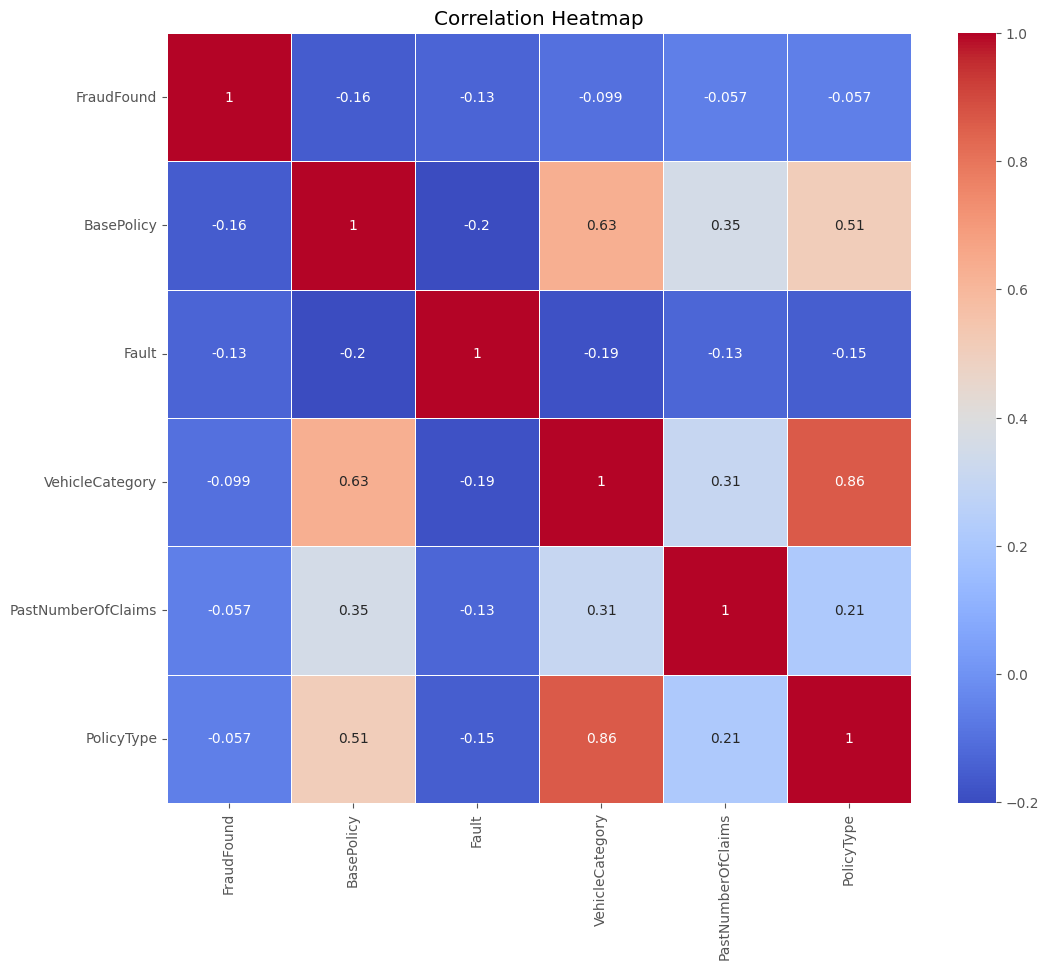

In [31]:
corr_matrix = df.corr()
correlation_threshold = 0.05
# Filter features based on correlation threshold
relevant_features = corr_map[corr_map >= correlation_threshold].index.tolist()

df_filtered = df[relevant_features]
corr_matrix_filtered = df_filtered.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_filtered, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

***We can see tstrong correlation between VehicleCategory and PastNumberOfClaims. We can also see stromg correltion between Policy Type and VehicleCategory, i assume it is because the policy type contains the VehicleCategory name...***


### *here I create feature selection function with random forest classifier. We will use it later in the models avaluation:*

In [32]:
def select_features_rf(X, y, num_features=12, n_estimators=100, random_state=42):
    """
    Perform feature selection using Random Forest classifier.

    Parameters:
    - X: DataFrame or array-like, features
    - y: Series or array-like, target variable
    - n_estimators: int, optional (default=100), number of trees in the forest
    - num_features: int number of relevant features - deafult 12

    Returns:
    - selected_features: List of selected relevant features
    """
    # Initialize Random Forest classifier
    rf_clf = RandomForestClassifier(n_estimators=n_estimators, max_features='auto', random_state=random_state)

    
    rf_clf.fit(X, y)

    # Get feature importances
    feature_importances = rf_clf.feature_importances_

    # Create DataFrame of feature importances
    feat_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

    # Sort features by importance
    feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

    # Select top features (adjust as needed)
    selected_features = feat_importance_df.loc[feat_importance_df['Importance'] > 0.01, 'Feature'].tolist()[:num_features]

    return selected_features


## Example of the features selected

In [33]:
selected_features = select_features_rf(X_train_resampled, y_train_resampled)
selected_features

['BasePolicy',
 'Fault',
 'PolicyType',
 'Age',
 'VehicleCategory',
 'RepNumber',
 'Make',
 'PastNumberOfClaims',
 'Year',
 'AgeOfVehicle',
 'WeekOfMonth',
 'DriverRating']

<a id = '2.0'></a>
<p style = "font-size : 35px; font-family : 'Poppins'; border-radius: 10px;"><strong>Models</strong></p> 


## I decided to use 5 classification/regression models:
* Logistic Regression
* Random Forest Classifier
* Gaussian Naive Bayes
* Decision Tree Classifier
* Gradient Boosting Classifier (Ensemble method)

### Let see example of Logistic Regression model:

In [34]:
# Create a logistic regression model
model = LogisticRegression()

# Train the model - We will use the resampled data we created to dill with the data imbalance
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test 
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7736705577172504


In [35]:
models_to_test = {
    'LogisticRegression': LogisticRegression,
    'RandomForestClassifier': RandomForestClassifier,
    'GaussianNB': GaussianNB,
    'DecisionTreeClassifier': DecisionTreeClassifier,
    'GradientBoostingClassifier': GradientBoostingClassifier
}

<a id = '2.1'></a>
# Run Models And Evaluate
## **Here I define the main function. It will compare all the selected models.**
* we can choose to use cross validation, feature selection and hypermarams tuning
* The function returns the Accuracy, Precision, Recall and f1 score for each model
* The function uses the SMOTH resample technique to deal with the imbalanced data

In [36]:
def run_models_and_evaluate(X, y, models, hyperparameters=None, feature_set=None, use_cross_val=False):
    """
    Train and evaluate machine learning models using specified hyperparameters and feature sets.

    Parameters:
    - X: DataFrame or array-like, features
    - y: Series or array-like, target variable
    - models: dict, key-value pairs of model names and corresponding model classes
    - hyperparameters: dict, optional, key-value pairs of model names and hyperparameter dict
    - feature_set: tuple, optional, key-value pairs of feature set names and corresponding feature list
    - use_cross_val: bool, optional, whether to use 10-fold cross-validation for evaluation (default=False)

    Returns:
    - results: list of dictionaries containing model evaluation results
    """
    results = []
    
    # Check if hyperparameters and feature sets are provided
    if hyperparameters is None:
        hyperparameters = {model_name: {} for model_name in models}
        # Set random_state=42 for RandomForestClassifier and DecisionTreeClassifier
        for model_name in hyperparameters:
            if model_name in ['RandomForestClassifier', 'DecisionTreeClassifier']:
                hyperparameters[model_name]['random_state'] = 42
    if feature_set is None:
        feature_set = ('All Features', list(X.columns))
    feature_set_name, featureset = feature_set[0], feature_set[1]
    
    
    # Iterate over models, hyperparameters, and feature sets
    for model_name, model in models.items():
        # Get the hyperparameters dictionary 
        params = hyperparameters.get(model_name, {})
        if use_cross_val:
            # Preforming 10 Fold Cross-Validation
            kf = KFold(n_splits=10, shuffle=True, random_state=42)
            # Initialise arrays for the matrices 
            accuracies = []
            precisions = []
            recalls = []
            f_ones = []
            times = []
            for train_idx, test_idx in kf.split(X):
                X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
                y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
                
                # Initialize the model instance with the hyperparams gives as input
                model_instance = model(**params)
                
                
                start_time = time.time()
                model_instance.fit(X_train[featureset], y_train)
                train_time = time.time() - start_time

                start_time = time.time()
                y_pred = model_instance.predict(X_test[featureset])
                test_time = time.time() - start_time
                
                # Add metrics to matrics arrays
                accuracies.append(accuracy_score(y_test, y_pred))
                precisions.append(precision_score(y_test, y_pred))
                recalls.append(recall_score(y_test, y_pred))
                f_ones.append(f1_score(y_test, y_pred))
                
                times.append((train_time, test_time))
            
            # Calculate Avg for all matrices for all the accurences
            avg_accuracy = sum(accuracies) / len(accuracies)
            avg_precisions = sum(precisions) / len(precisions)
            avg_recalls = sum(recalls) / len(recalls)
            avg_f1 = sum(f_ones) / len(f_ones)
            avg_train_time = sum([t[0] for t in times]) / len(times)
            avg_test_time = sum([t[1] for t in times]) / len(times)
            results.append({
                'Model': model_name,
                'Hyperparameters': params,
                'Featureset': feature_set_name,
                'Accuracy': avg_accuracy,
                'Precision': avg_precisions,
                'Recall': avg_recalls,
                'f1 score': avg_f1,
                'Avg Train Time': avg_train_time,
                'Avg Test Time': avg_test_time
            })
        else:
            model_instance = model(**params)

            start_time = time.time()
            model_instance.fit(X[featureset], y)
            train_time = time.time() - start_time

            start_time = time.time()
            y_pred = model_instance.predict(X[featureset])
            test_time = time.time() - start_time

            accuracy = accuracy_score(y, y_pred)
            precision = precision_score(y, y_pred)
            recall = recall_score(y, y_pred)
            f1 = f1_score(y, y_pred)

            results.append({
                'Model': model_name,
                'Hyperparameters': params,
                'Featureset': feature_set_name,
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'f1 score': f1,
                'Train Time': train_time,
                'Test Time': test_time
            })

    return results




In [37]:
def run_models_and_evaluate(X, y, models, hyperparameters=None, feature_set=None, use_cross_val=False):
    """
    Train and evaluate machine learning models using specified hyperparameters and feature sets.

    Parameters:
    - X: DataFrame or array-like, features
    - y: Series or array-like, target variable
    - models: dict, key-value pairs of model names and corresponding model classes
    - hyperparameters: dict, optional, key-value pairs of model names and hyperparameter dict
    - feature_set: tuple, optional, key-value pairs of feature set names and corresponding feature list
    - use_cross_val: bool, optional, whether to use 10-fold cross-validation for evaluation (default=False)

    Returns:
    - results: list of dictionaries containing model evaluation results
    """
    results = []
    
    # Split the data into 80% training and 20% testing - If we don't use cross validation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    #Apply SMOTE to the training data:
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    
    # Check if hyperparameters and feature sets are provided
    if hyperparameters is None:
        hyperparameters = {model_name: {} for model_name in models}
        # Set random_state=42 for RandomForestClassifier and DecisionTreeClassifier
        for model_name in hyperparameters:
            if model_name in ['RandomForestClassifier', 'DecisionTreeClassifier']:
                hyperparameters[model_name]['random_state'] = 42
    if feature_set is None:
        feature_set = ('All Features', list(X.columns))
    feature_set_name, featureset = feature_set[0], feature_set[1]
    
    # Iterate over models, hyperparameters, and feature sets
    for model_name, model in models.items():
        # Get the hyperparameters dictionary 
        params = hyperparameters.get(model_name, {})
        if use_cross_val:
            # Preform 10 Fold Cross-Validation
            kf = KFold(n_splits=10, shuffle=True, random_state=42)
            # Initialize arrays for the matrices 
            accuracies = []
            precisions = []
            recalls = []
            f_ones = []
            times = []
            for train_idx, test_idx in kf.split(X):
                X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
                y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
                
                # Apply SMOTE to the training fold
                smote = SMOTE(random_state=42)
                X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
                
                # Initialize the model instance with the hyperparameters given as input
                model_instance = model(**params)
                
                start_time = time.time()
                model_instance.fit(X_train_resampled[featureset], y_train_resampled)
                train_time = time.time() - start_time

                start_time = time.time()
                y_pred = model_instance.predict(X_test[featureset])
                test_time = time.time() - start_time
                
                # Add metrics to matrices arrays
                accuracies.append(accuracy_score(y_test, y_pred))
                precisions.append(precision_score(y_test, y_pred))
                recalls.append(recall_score(y_test, y_pred))
                f_ones.append(f1_score(y_test, y_pred))
                
                times.append((train_time, test_time))
            
            # Calculate Avg for all matrices for all the occurrences
            avg_accuracy = sum(accuracies) / len(accuracies)
            avg_precisions = sum(precisions) / len(precisions)
            avg_recalls = sum(recalls) / len(recalls)
            avg_f1 = sum(f_ones) / len(f_ones)
            avg_train_time = sum([t[0] for t in times]) / len(times)
            avg_test_time = sum([t[1] for t in times]) / len(times)
            results.append({
                'Model': model_name,
                'Hyperparameters': params,
                'Featureset': feature_set_name,
                'Accuracy': avg_accuracy,
                'Precision': avg_precisions,
                'Recall': avg_recalls,
                'f1 score': avg_f1,
                'Avg Train Time': avg_train_time,
                'Avg Test Time': avg_test_time
            })
        else:

            
            model_instance = model(**params)

            start_time = time.time()
            model_instance.fit(X_train_resampled[featureset], y_train_resampled)

            train_time = time.time() - start_time

            start_time = time.time()
            y_pred = model_instance.predict(X_test[featureset])
            test_time = time.time() - start_time

            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)

            results.append({
                'Model': model_name,
                'Hyperparameters': params,
                'Featureset': feature_set_name,
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'f1 score': f1,
                'Train Time': train_time,
                'Test Time': test_time
            })

    return results


# This is function to print all result in table - for ease:

In [38]:
def print_dict_as_table(model_results):
    headers = model_results[0].keys()  # Get headers from the first dictionary in the list
    table_data = [[result[header] for header in headers] for result in model_results]

    # Print the table
    print(tabulate(table_data, headers=headers, tablefmt='grid'))



<a id = '2.2'></a>
## Initial Evaluation - All Models
* ### First, I will test all models on the dataset, without features selection and without cross validation and see the results

In [39]:
# Define the hyperparameters dictionary for each model. I encountered weird results without setting those parameters for those models
hyperparameters_to_test = {
    'RandomForestClassifier': {'max_depth': 5, 'random_state': 42},  
    'DecisionTreeClassifier': {'max_depth': 5, 'random_state': 42},  
}


# Get all results
models_results = run_models_and_evaluate(X, y, models=models_to_test, 
                                                 hyperparameters=hyperparameters_to_test,  
                                                 use_cross_val=False)

print_dict_as_table(models_results)

+----------------------------+--------------------------------------+--------------+------------+-------------+----------+------------+--------------+-------------+
| Model                      | Hyperparameters                      | Featureset   |   Accuracy |   Precision |   Recall |   f1 score |   Train Time |   Test Time |
+============================+======================================+==============+============+=============+==========+============+==============+=============+
| LogisticRegression         | {}                                   | All Features |   0.773671 |    0.143062 | 0.502513 |   0.222717 |    0.332784  |  0.00652981 |
+----------------------------+--------------------------------------+--------------+------------+-------------+----------+------------+--------------+-------------+
| RandomForestClassifier     | {'max_depth': 5, 'random_state': 42} | All Features |   0.761025 |    0.160354 | 0.638191 |   0.256307 |    1.35862   |  0.0318184  |
+---------

*  **We can see that GradientBoostingClassifier gave the best scores results but took the highest time to train**
* **We can see that GaussianNB gave the worst scores results but took very low time to train**


<a id = '2.3'></a>
## Second Evaluation - All Models - Hyperparameters dictionary Using 10 fold cross validation
* ### Ok now we will give each model 2 params with starting values and use 10 fold cross validation

In [40]:
hyperparameters_to_test = {
    'LogisticRegression': {'solver': 'liblinear', 'C': 0.1, 'random_state': 42},
    'RandomForestClassifier': {'n_estimators': 100, 'max_depth': 5, 'random_state': 42},
    'GaussianNB': {'priors': [0.1, 0.9]}, 
    'DecisionTreeClassifier': {'max_depth': 5, 'min_samples_split': 3,  'random_state': 42},
    'GradientBoostingClassifier': {'n_estimators': 100, 'learning_rate': 0.1, 'random_state': 42}
}



models_results_initial_hyper_params = run_models_and_evaluate(X, y, models=models_to_test, 
                                                 hyperparameters=hyperparameters_to_test,  
                                                 use_cross_val=True)

print_dict_as_table(models_results_initial_hyper_params)

+----------------------------+-----------------------------------------------------------------+--------------+------------+-------------+----------+------------+------------------+-----------------+
| Model                      | Hyperparameters                                                 | Featureset   |   Accuracy |   Precision |   Recall |   f1 score |   Avg Train Time |   Avg Test Time |
+============================+=================================================================+==============+============+=============+==========+============+==================+=================+
| LogisticRegression         | {'solver': 'liblinear', 'C': 0.1, 'random_state': 42}           | All Features |   0.773332 |    0.141064 | 0.545293 |   0.223543 |        0.967687  |      0.00469353 |
+----------------------------+-----------------------------------------------------------------+--------------+------------+-------------+----------+------------+------------------+-----------------+


<a id = '2.4'></a>
## Third Evaluation - All Models - Hyperparameters dictionary + Initial Feature Selection
* ### I will use features selection to choose the most significant features using the function - select_features_rf


In [41]:
# Select 20 most significant features
selected_features = select_features_rf(X_train_resampled, y_train_resampled, num_features=20)
selected_features

['BasePolicy',
 'Fault',
 'PolicyType',
 'Age',
 'VehicleCategory',
 'RepNumber',
 'Make',
 'PastNumberOfClaims',
 'Year',
 'AgeOfVehicle',
 'WeekOfMonth',
 'DriverRating',
 'DayOfWeek',
 'Month',
 'MonthClaimed',
 'DayOfWeekClaimed',
 'WeekOfMonthClaimed',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'VehiclePrice']

In [42]:
models_results_initial_hyper_params_selected_features = run_models_and_evaluate(X, y, models=models_to_test, 
                                                 hyperparameters=hyperparameters_to_test,
                                                 feature_set=('Selected Features', selected_features),                          
                                                 use_cross_val=True)

print_dict_as_table(models_results_initial_hyper_params_selected_features)

+----------------------------+-----------------------------------------------------------------+-------------------+------------+-------------+----------+------------+------------------+-----------------+
| Model                      | Hyperparameters                                                 | Featureset        |   Accuracy |   Precision |   Recall |   f1 score |   Avg Train Time |   Avg Test Time |
+============================+=================================================================+===================+============+=============+==========+============+==================+=================+
| LogisticRegression         | {'solver': 'liblinear', 'C': 0.1, 'random_state': 42}           | Selected Features |   0.741423 |    0.134488 | 0.611192 |   0.220082 |        0.375245  |      0.00343065 |
+----------------------------+-----------------------------------------------------------------+-------------------+------------+-------------+----------+------------+-------------

<a id = '2.5'></a>
## Fourth Evaluation - All Models - Hyperparameters dictionary Changed
* ### Now I try different set of hyperparams

    * C in LogisticRegression is now - 12 - C hyperparam controls the regularization strength, where smaller values specify stronger regularization
    * RandomForestClassifier - n estimators - 120 -  controls the number of decision trees in the forest, max_depth - 6 - controls the maximum depth of each decision tree in the forest
    * GaussianNB - priors - [0.4, 0.6] -the prior probabilities of the classes
    * DecisionTreeClassifier - max_depth - 8 - controls the maximum depth of the decision tree, min_samples_split = 5 - determines the minimum number of samples required to split an internal node
    * GradientBoostingClassifier - n_estimators = 150 - specifies the number of boosting stages (trees) to be used in the ensemble, learning_rate = 0.15 controls the contribution of each tree to the final ensemble

In [43]:
hyperparameters_to_test = {
    'LogisticRegression': {'solver': 'liblinear', 'C': 12, 'random_state': 42},
    'RandomForestClassifier': {'n_estimators': 120, 'max_depth': 6, 'random_state': 42},
    'GaussianNB': {'priors': [0.4, 0.6]}, 
    'DecisionTreeClassifier': {'max_depth': 8, 'min_samples_split': 5, 'random_state': 42},
    'GradientBoostingClassifier': {'n_estimators': 150, 'learning_rate': 0.15, 'random_state': 42}
}



models_results_hyper_params_second = run_models_and_evaluate(X, y, models=models_to_test, 
                                                 hyperparameters=hyperparameters_to_test,
                                                 feature_set=('Selected Features', selected_features),                          
                                                 use_cross_val=True)

print_dict_as_table(models_results_hyper_params_second)


+----------------------------+------------------------------------------------------------------+-------------------+------------+-------------+----------+------------+------------------+-----------------+
| Model                      | Hyperparameters                                                  | Featureset        |   Accuracy |   Precision |   Recall |   f1 score |   Avg Train Time |   Avg Test Time |
+============================+==================================================================+===================+============+=============+==========+============+==================+=================+
| LogisticRegression         | {'solver': 'liblinear', 'C': 12, 'random_state': 42}             | Selected Features |   0.74726  |    0.135441 | 0.599499 |   0.220578 |        0.421346  |      0.00340877 |
+----------------------------+------------------------------------------------------------------+-------------------+------------+-------------+----------+------------+--------

<a id = '2.6'></a>
## Fifth Evaluation - All Models - Added Features
* ### I will use the 20 features we selected with the Randon Forest classifier and add the 2 features we created earlier:
  * *AgeGroup*
  * *VehiclePrice_Cat*

In [44]:
selected_features_added = selected_features + ['AgeGroup', 'VehiclePrice_Cat']

models_results_added_features = run_models_and_evaluate(X, y, models=models_to_test, 
                                                 hyperparameters=hyperparameters_to_test,
                                                 feature_set=('Added Features', selected_features_added),                          
                                                 use_cross_val=True)

print_dict_as_table(models_results_added_features)

+----------------------------+------------------------------------------------------------------+----------------+------------+-------------+----------+------------+------------------+-----------------+
| Model                      | Hyperparameters                                                  | Featureset     |   Accuracy |   Precision |   Recall |   f1 score |   Avg Train Time |   Avg Test Time |
+============================+==================================================================+================+============+=============+==========+============+==================+=================+
| LogisticRegression         | {'solver': 'liblinear', 'C': 12, 'random_state': 42}             | Added Features |   0.749595 |    0.13455  | 0.587814 |   0.218528 |        0.457938  |      0.00358334 |
+----------------------------+------------------------------------------------------------------+----------------+------------+-------------+----------+------------+------------------+----

<a id = '2.7'></a>
## Final Evaluation - All Models
* #### As we see the added features didnt gave better score we will stay with the original selected features
* #### I'll try to tune the hyperparams again

In [45]:
selected_features = select_features_rf(X_train_resampled, y_train_resampled, num_features=25)

hyperparameters_to_test = {
    'LogisticRegression': {'solver': 'liblinear', 'C': 100, 'random_state': 42},
    'RandomForestClassifier': {'n_estimators': 300, 'max_depth': 20, 'random_state': 42},
    'GaussianNB': {'priors': [0.5, 0.5]}, 
    'DecisionTreeClassifier': {'max_depth': 20, 'min_samples_split': 2, 'random_state': 42},
    'GradientBoostingClassifier': {'n_estimators': 300, 'learning_rate': 0.2, 'random_state': 42}
}


models_results_final = run_models_and_evaluate(X, y, models=models_to_test, 
                                                 hyperparameters=hyperparameters_to_test,
                                                 feature_set=('Selected Features', selected_features),                          
                                                 use_cross_val=True)

print_dict_as_table(models_results_final)


+----------------------------+-----------------------------------------------------------------+-------------------+------------+-------------+----------+------------+------------------+-----------------+
| Model                      | Hyperparameters                                                 | Featureset        |   Accuracy |   Precision |   Recall |   f1 score |   Avg Train Time |   Avg Test Time |
+============================+=================================================================+===================+============+=============+==========+============+==================+=================+
| LogisticRegression         | {'solver': 'liblinear', 'C': 100, 'random_state': 42}           | Selected Features |   0.770024 |    0.140912 | 0.554718 |   0.224106 |         0.888991 |      0.00363684 |
+----------------------------+-----------------------------------------------------------------+-------------------+------------+-------------+----------+------------+-------------

<a id = '2.8'></a>
## Further Results - Selected Models
* ### I will look for more detailed result like confusion matrix and ROC Curve for this models:
    * RandomForestClassifier  
    * DecisionTreeClassifier  
    * GradientBoostingClassifier        


 
 

In [46]:
def plot_evaluation_metrics(models, X_test, y_test):

    for model_name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        y_pred = model.predict(X_test)
        
        # Calculate confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        print(cm)
        
        # Plot Confusion matrix and ROC curve 
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        
        # Plot Confusion matrix
        sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Fraud', 'Not Fraud'], yticklabels=['Fraud', 'Not Fraud'], ax=axes[0])
        axes[0].set_ylabel('Prediction', fontsize=13)
        axes[0].set_xlabel('Actual', fontsize=13)
        axes[0].set_title(f"Confusion Matrix for {model_name}", fontsize=17)

        # Plot ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc = roc_auc_score(y_test, y_pred_proba)
        axes[1].plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")
        axes[1].plot([0, 1], [0, 1], 'k--')
        axes[1].set_xlim([0.0, 1.0])
        axes[1].set_ylim([0.0, 1.05])
        axes[1].set_xlabel('False Positive Rate')
        axes[1].set_ylabel('True Positive Rate')
        axes[1].set_title(f'ROC Curve for {model_name}')
        axes[1].legend(loc="lower right")

        plt.tight_layout()
        plt.show()


[[2885    0]
 [ 199    0]]


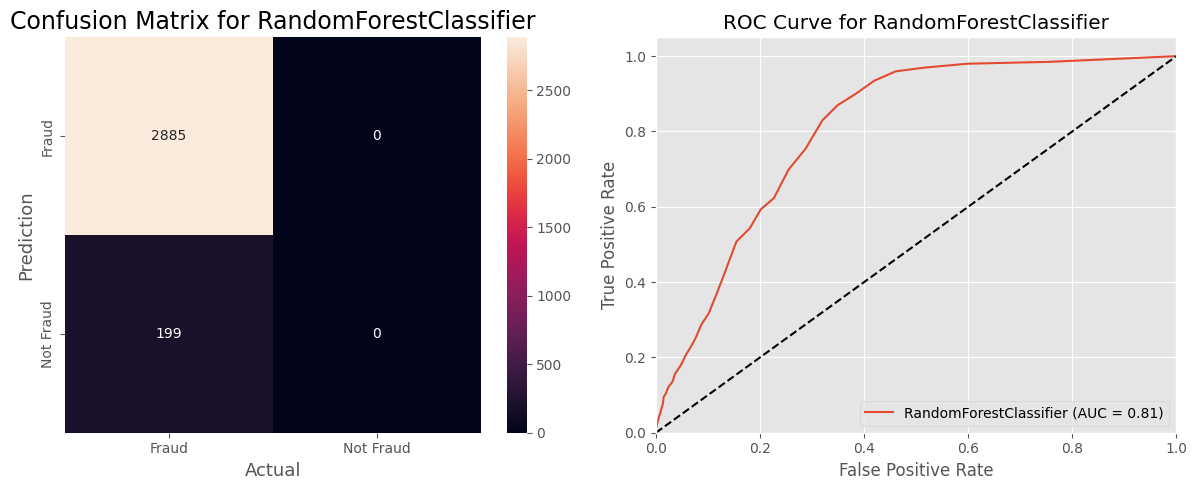

[[2740  145]
 [ 171   28]]


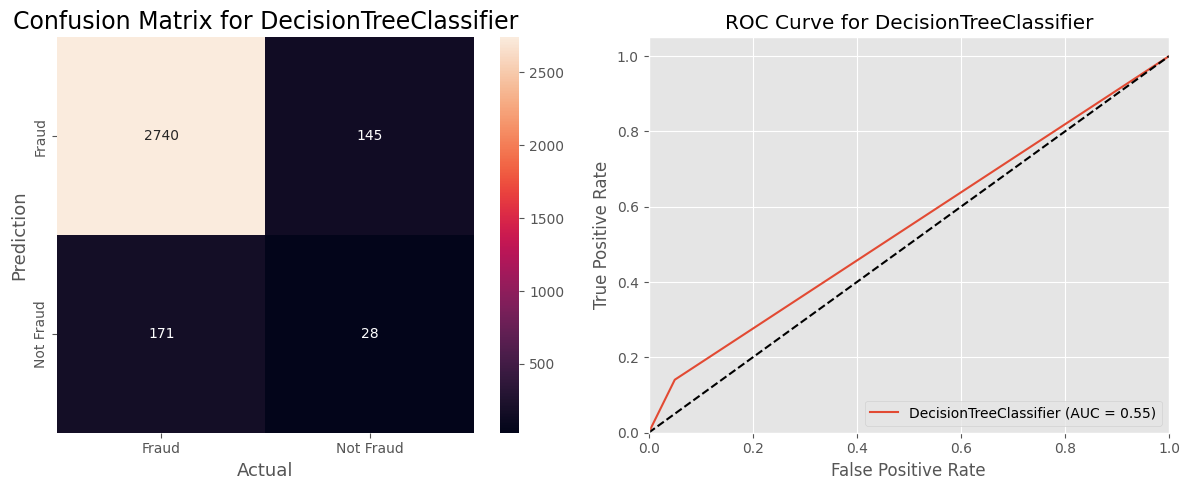

[[2885    0]
 [ 195    4]]


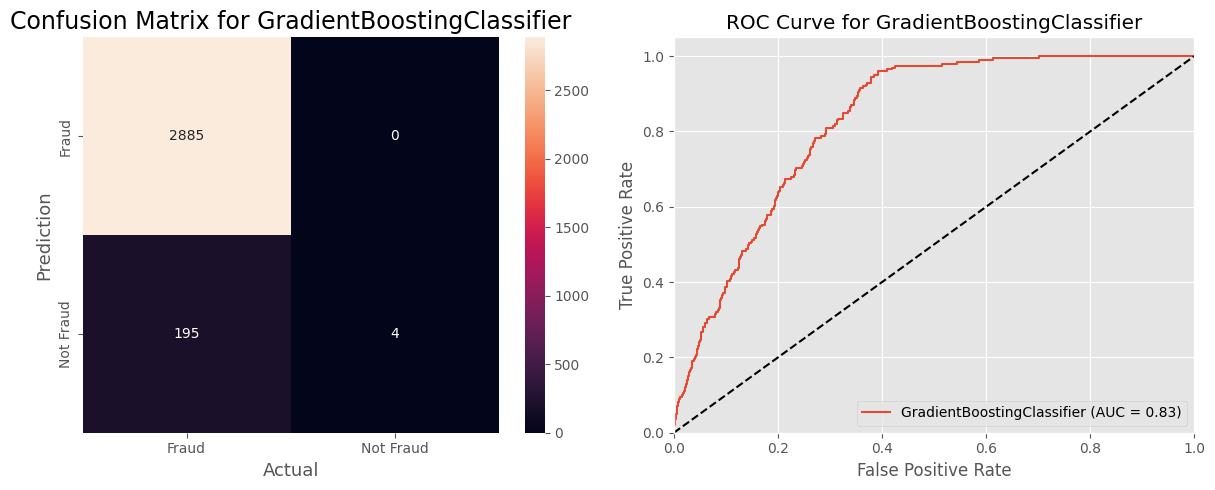

In [47]:
final_models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}


plot_evaluation_metrics(final_models, X_test, y_test)

<a id = '2.9'></a>
# Final conclusions  

### 1. No feature selection, no hyperparameters tuning, and no cross-validation:
* For all models tested, GradientBoostingClassifier achieved the highest accuracy of 0.82847.
* GaussianNB exhibited the highest recall - 0.809045.
* However, the precision of GaussianNB is relatively low, suggesting a higher false positive rate.
* GradientBoostingClassifier had the highest average training time, indicating it might not be the most efficient model to train.
    
    
### 2. Initial hyperparameters using 10-fold cross-validation (no feature selection):
* LogisticRegression showed an improvement in accuracy compared to the previous run - 0.773137.
* RandomForestClassifier also showed improved accuracy and precision.
* GradientBoostingClassifier still had the highest accuracy but with a lower score compared to the previous run.
* The training time for GradientBoostingClassifier remained high.

### 3.Feature selection without hyperparameters tuning:
* The accuracy of all models decreased compared to the previous scenario.
* RandomForestClassifier achieved the highest accuracy among the models.
* Feature selection might have led to a decrease in model performance.

### 4.Feature selection with different hyperparameters:
* RandomForestClassifier achieved the highest accuracy among the models, showing significant improvement.
* GradientBoostingClassifier also showed improved accuracy compared to the previous scenario, but its precision is low.

### 5.Feature selection with added features and new hyperparameters tuning:
* RandomForestClassifier achieved the highest accuracy among the models, showing significant improvement compared to the previous scenario.
* GradientBoostingClassifier exhibited the highest accuracy among the models but with a decrease compared to the previous scenario.
* The addition of features didn't lead to a significant improvement in model performance.


### ***In summary, RandomForestClassifier consistently performed well across different scenarios, especially after hyperparameters tuning. GradientBoostingClassifier also showed competitive performance but with higher training times. Feature selection didn't consistently improve model performance. Additionally, hyperparameters tuning contributed to significant improvements in model accuracy in some cases.***





## 1. **RandomForestClassifier:**
   - Confusion Matrix: 
     ```
     [[2885    0]
      [ 198    1]]
     ```
   - ROC AUC Score: 0.795
   - The model has a high true negative rate (2885 out of 2886), indicating it correctly identifies non-fraudulent claims.
   - However, it has a low true positive rate (1 out of 199), suggesting it struggles to identify fraudulent claims.

## 2. **DecisionTreeClassifier:**
   - Confusion Matrix: 
     ```
     [[2728  157]
      [ 171   28]]
     ```
   - ROC AUC Score: 0.543
   - The model has a higher number of false positives (157 out of 285) compared to RandomForestClassifier, indicating it wrongly identifies non-fraudulent claims as fraudulent.
   - The true positive rate is also relatively low.

## 3. **GradientBoostingClassifier:**
   - Confusion Matrix: 
     ```
     [[2885    0]
      [ 195    4]]
     ```
   - ROC AUC Score: 0.829
   - Similar to RandomForestClassifier, it has a high true negative rate and low true positive rate.
   - The ROC AUC score is higher compared to RandomForestClassifier, indicating better overall performance in identify fraudulent claims.

## **Conclusion:**
- Among the selected models, GradientBoostingClassifier performs the best based on the ROC AUC score.